# Optimal Water Station Placement

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
rcParams['animation.html'] = 'html5'
sns.set_style("white")

np.set_printoptions(precision=2,suppress=True)

In [3]:
N = 10 # number of houses
K = 3 # number of water-stations
habitation = np.random.rand(2,N)

## Location of Houses

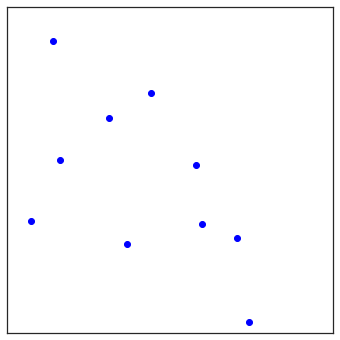

In [4]:
fig,ax = plt.subplots(1,1)
ax.scatter(habitation[0],habitation[1],c='b')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.show()

## Simulated Annealing Based Optimization

In [5]:
def distance(habitation,stations):
    diff = habitation[:,:,None] - stations[:,None,:]
    return np.sqrt(np.sum(diff**2,axis=0))

In [6]:
def match_stations(habitation,stations):
    D = distance(habitation,stations)
    s = np.argmin(D,axis=1)
    min_dist = np.min(D,axis=1)
    return s, min_dist

In [7]:
def plot_village(habitation,stations, title = "", ax=None):
    if ax is None:
        ax = plt.gca()
    ax.clear()
    s, min_dist = match_stations(habitation,stations)
    ax.scatter(habitation[0],habitation[1],c='b', label='Houses')
    ax.scatter(stations[0],stations[1],c='r', label='Water Stations')
    
    for n,s_n in enumerate(s):
        ax.plot((habitation[0,n],stations[0,s_n]),(habitation[1,n],stations[1,s_n]), 'y')
    
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.legend(frameon=True)
    ax.set_title(title)

### Initialize Stations

In [8]:
EPOCHS = 1000
unit_cost = 0.1
rise = 1.01
sig = 0.02

In [9]:
stations_curr = np.random.rand(2,K) # randomly initialize the locations of stations
s, min_dist = match_stations(habitation,stations_curr)
dist_curr = np.sum(min_dist)

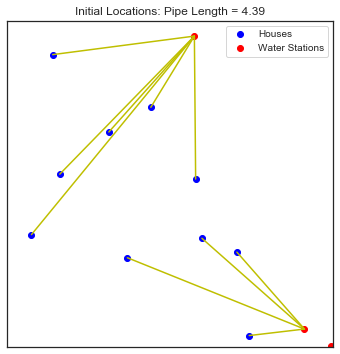

In [10]:
fig_init, ax_init = plt.subplots(1,1)
plot_village(habitation,stations_curr, title = 'Initial Locations: Pipe Length = {:.2f}'.format(dist_curr) ,ax = ax_init)
plt.show()

In [11]:
for eph in range(EPOCHS):
    for k in range(K):
        stations_pr = stations_curr.copy()
        stations_pr[:,k] += sig*np.random.randn(2)
        if 0 < stations_pr[0,k] < 1 and 0 < stations_pr[1,k] < 1:
            s, min_dist = match_stations(habitation,stations_pr)
            dist_pr = np.sum(min_dist)
            delta_cost = unit_cost*(dist_pr - dist_curr)
            if np.random.rand() < np.exp(-delta_cost):
                stations_curr[:,k] = stations_pr[:,k]
                dist_curr = dist_pr
    unit_cost *= rise 

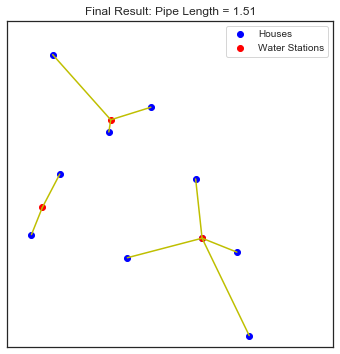

In [12]:
fig_res, ax_res = plt.subplots(1,1)
plot_village(habitation,stations_curr, title='Final Result: Pipe Length = {:.2f}'.format(dist_curr), ax=ax_res)
plt.show()

## Animation

In [13]:
EPOCHS = 1000
unit_cost = 0.1
rise = 1.01
sig = 0.02

In [14]:
stations_curr = np.random.rand(2,K) # randomly initialize the locations of stations
s, min_dist = match_stations(habitation,stations_curr)
dist_curr = np.sum(min_dist)

In [15]:
fig, ax = plt.subplots(1,1)

def animate(eph):
    global ax,stations,habitation,dist_curr,unit_cost
    k = eph % 3
    unit_cost = unit_cost*rise if k==0 else unit_cost
    
    stations_pr = stations_curr.copy()
    stations_pr[:,k] += sig*np.random.randn(2)
    if 0 < stations_pr[0,k] < 1 and 0 < stations_pr[1,k] < 1:
        s, min_dist = match_stations(habitation,stations_pr)
        dist_pr = np.sum(min_dist)
        delta_cost = unit_cost*(dist_pr - dist_curr)
        if np.random.rand() < np.exp(-delta_cost):
            stations_curr[:,k] = stations_pr[:,k]
            dist_curr = dist_pr
    plot_village(habitation,stations_curr,title='Unit Cost = {:.1f} - Pipe Length = {:.2f}'.format(unit_cost, dist_curr), ax=ax)
    return ax.artists
    
anim = animation.FuncAnimation(fig, animate, range(EPOCHS*3), interval=50, blit=False)

In [16]:
anim